<a href="https://colab.research.google.com/github/thianjin/SCB_ET_ML_Training/blob/main/tensorflowExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(xtr,ytr),(xts,yts) = fashion_mnist.load_data()
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(names)

10

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
(xtr,ytr),(xts,yts) = fashion_mnist.load_data()

In [ ]:
names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(names)
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


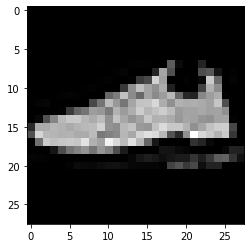

In [ ]:
plt.imshow(xtr[55180],cmap='gray')
plt.show()

In [ ]:
ytr[55180]

7

In [ ]:
names[ytr[55180]]

'Sneaker'

In [10]:
## Preprocessing of data

ytr

# for multiclass classification, we need to onehotencode the labels
from tensorflow.keras.utils import to_categorical
ytr = to_categorical(ytr)
print(ytr.shape)
yts = to_categorical(yts)
print(yts.shape)

# converting images into channel format
print(xtr.shape)
print(xts.shape)

(60000, 10)
(10000, 10)
(60000, 28, 28)
(10000, 28, 28)


In [11]:
## modelling of Neural Network

from tensorflow.keras import models,layers

# creating input layer
input_layer = layers.Input(shape=(28,28))

# add a fltten layer, flatten layer flattens the array, e.g. a 5x5 array will be converted to 1x25
# here we are using flatten layer to convert image of shape 28x28 to 1x784 so that each pixel can be fed to next layer
ft = layers.Flatten()(input_layer)

# add the first hidden layer -> full connnected layer where each neuron does weighted sum and activation function. such layers in tensorflow are termed as dense layers
h1 = layers.Dense(200,activation='relu')(ft)

# add the second hidden layer
h2 = layers.Dense(100,activation='relu')(h1)

# add the final output layer
output_layer = layers.Dense(10,activation='softmax')(h2)


model = models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
# metrics - to check performance of the model e.g. - accuracy, recall, r2 score
# optmizier - the optmizier which will update the weights and bais to minimize the error function, e.g. adam, sgd, RMSProp => we prefer using adam as it tunes learning rate automaticalllu
# loss = how the overall error to be calculated, for regression - mse , for two class classification - binary_crossentropy, for multiclass classification - categorical_crossentropy
model.compile(metrics=['accuracy'],optimizer='adam',loss='categorical_crossentropy')
model.fit(xtr,ytr,epochs=10,batch_size=1000,validation_data=(xts,yts))

Epoch 1/10
60/60 [==============================] - 2s 25ms/step - loss: 10.5876 - accuracy: 0.6827 - val_loss: 3.2225 - val_accuracy: 0.7584
Epoch 2/10
60/60 [==============================] - 1s 22ms/step - loss: 2.2557 - accuracy: 0.7765 - val_loss: 1.9780 - val_accuracy: 0.7672
Epoch 3/10
60/60 [==============================] - 1s 22ms/step - loss: 1.4576 - accuracy: 0.7982 - val_loss: 1.4191 - val_accuracy: 0.7962
Epoch 4/10
60/60 [==============================] - 1s 22ms/step - loss: 1.0721 - accuracy: 0.8149 - val_loss: 1.2743 - val_accuracy: 0.7989
Epoch 5/10
60/60 [==============================] - 1s 22ms/step - loss: 0.8796 - accuracy: 0.8288 - val_loss: 1.0842 - val_accuracy: 0.8122
Epoch 6/10
60/60 [==============================] - 1s 23ms/step - loss: 0.7605 - accuracy: 0.8360 - val_loss: 0.9596 - val_accuracy: 0.8222
Epoch 7/10
60/60 [==============================] - 1s 24ms/step - loss: 0.6606 - accuracy: 0.8445 - val_loss: 0.9245 - val_accuracy: 0.8176
Epoch 8/10
6